In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tensorflow import keras

In [2]:
df_2000_2019 = pd.read_csv("forex_all_2000_2019.csv")
df_2000_2019 = df_2000_2019.drop(columns=df_2000_2019.columns[0])
df_2000_2019_AUD = df_2000_2019[["Time Serie", "AUSTRALIA - AUSTRALIAN DOLLAR/US$"]].dropna()
df_2000_2019_AUD.head()

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$
0,2000-01-03,1.5172
1,2000-01-04,1.5239
2,2000-01-05,1.5267
3,2000-01-06,1.5291
4,2000-01-07,1.5272


In [3]:
df_2000_2019_AUD.rename(columns={'Time Serie':'DATE', 'AUSTRALIA - AUSTRALIAN DOLLAR/US$':'AUD_USD'}, inplace=True)
df_2000_2019_AUD['DATE'] = pd.to_datetime(df_2000_2019_AUD['DATE'])
df_2000_2019_AUD['MONTH'] = df_2000_2019_AUD['DATE'].dt.month
df_2000_2019_AUD['YEAR'] = df_2000_2019_AUD['DATE'].dt.year
df_2000_2019_AUD['MONTH_YEAR'] = df_2000_2019_AUD['DATE'].dt.to_period('M')
df_2000_2019_AUD.head()

,DATE,AUD_USD,MONTH,YEAR,MONTH_YEAR
0,2000-01-03,1.5172,1,2000,2000-01
1,2000-01-04,1.5239,1,2000,2000-01
2,2000-01-05,1.5267,1,2000,2000-01
3,2000-01-06,1.5291,1,2000,2000-01
4,2000-01-07,1.5272,1,2000,2000-01


In [4]:
df = pd.read_csv("forex_data_aud.csv")
df.head()

,DATE,OPEN,HIGH,LOW,CLOSE
0,2023-07-04,1.49997,1.50639,1.49419,1.49943
1,2023-06-30,1.49660,1.51591,1.48750,1.49990
2,2023-06-23,1.45256,1.50065,1.45250,1.49700
3,2023-06-16,1.48225,1.48529,1.44890,1.45400
4,2023-06-09,1.51348,1.51962,1.48100,1.48320


In [5]:
print(df.columns)

Index(['DATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE'], dtype='object')


In [6]:
df.dropna()
df.isna().sum()

DATE     0
OPEN     0
HIGH     0
LOW      0
CLOSE    0
dtype: int64

In [7]:
df.dtypes

DATE      object
OPEN     float64
HIGH     float64
LOW      float64
CLOSE    float64
dtype: object

In [8]:
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [9]:
df.head()

,DATE,OPEN,HIGH,LOW,CLOSE
0,2023-07-04,1.49997,1.50639,1.49419,1.49943
1,2023-06-30,1.49660,1.51591,1.48750,1.49990
2,2023-06-23,1.45256,1.50065,1.45250,1.49700
3,2023-06-16,1.48225,1.48529,1.44890,1.45400
4,2023-06-09,1.51348,1.51962,1.48100,1.48320


In [10]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['MONTH'] = df['DATE'].dt.month
df['YEAR'] = df['DATE'].dt.year
df['MONTH_YEAR'] = df['DATE'].dt.to_period('M')

In [11]:
df.head()

,DATE,OPEN,HIGH,LOW,CLOSE,MONTH,YEAR,MONTH_YEAR
0,2023-07-04,1.49997,1.50639,1.49419,1.49943,7,2023,2023-07
1,2023-06-30,1.49660,1.51591,1.48750,1.49990,6,2023,2023-06
2,2023-06-23,1.45256,1.50065,1.45250,1.49700,6,2023,2023-06
3,2023-06-16,1.48225,1.48529,1.44890,1.45400,6,2023,2023-06
4,2023-06-09,1.51348,1.51962,1.48100,1.48320,6,2023,2023-06


In [39]:
df_group_by_aud_2020_2023 = df.query("YEAR > 2019").groupby("MONTH_YEAR").CLOSE.mean().reset_index()
df_group_by_aud_2020_2023.rename(columns={'CLOSE':'AUD_USD'}, inplace=True)
df_group_by_aud_2020_2023.head()

,MONTH_YEAR,AUD_USD
0,2020-01,1.459840
1,2020-02,1.507950
2,2020-03,1.616650
3,2020-04,1.593925
4,2020-05,1.534920


In [40]:
df_2000_2019_AUD.head()
df_2000_2019_AUD.set_index("MONTH_YEAR")
df_2000_2019_AUD = df_2000_2019_AUD[["MONTH_YEAR", "AUD_USD"]].dropna()

In [41]:
 df_group_by_aud_2020_2023.head()

,MONTH_YEAR,AUD_USD
0,2020-01,1.459840
1,2020-02,1.507950
2,2020-03,1.616650
3,2020-04,1.593925
4,2020-05,1.534920


In [60]:
df_2000_2023 = pd.concat([df_2000_2019_AUD, df_group_by_aud_2020_2023], join="inner")
df_2000_2023.head()
df_2000_2023.count
df_2000_2023.dropna()
df_2000_2023['AUD_USD'] = pd.to_numeric(df_2000_2023['AUD_USD'], errors='coerce')
df_2000_2023.head()
df_2000_2023 = df_2000_2023.groupby('MONTH_YEAR').AUD_USD.mean().reset_index()

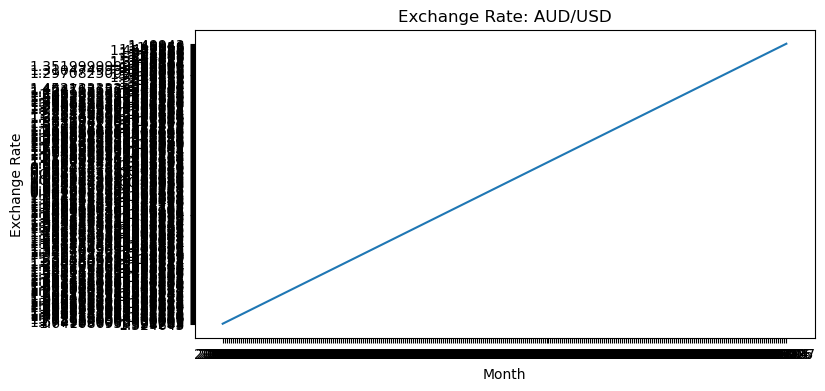

In [61]:
from matplotlib import pyplot as plt
x = df_2000_2023['MONTH_YEAR'].astype('str')
y = df_2000_2023['AUD_USD'].astype('str')
plt.figure(figsize=(8, 4))
plt.plot(x, y)
plt.title("Exchange Rate: AUD/USD")
plt.xlabel("Month")
plt.ylabel("Exchange Rate")
plt.show()



In [63]:
# df_2000_2023.rename(columns={'CLOSE':'AUD_USD'}, inplace=True)
df_2000_2023['USD'] = [1 for i in range(283)]
df_2000_2023.tail()

,MONTH_YEAR,AUD_USD,USD
278,2023-03,1.497598,1
279,2023-04,1.498550,1
280,2023-05,1.505800,1
281,2023-06,1.489460,1
282,2023-07,1.499430,1


In [49]:
print(x)

0     2000-01
1     2000-01
2     2000-01
3     2000-01
4     2000-01
       ...   
38    2023-03
39    2023-04
40    2023-05
41    2023-06
42    2023-07
Name: MONTH_YEAR, Length: 5260, dtype: object


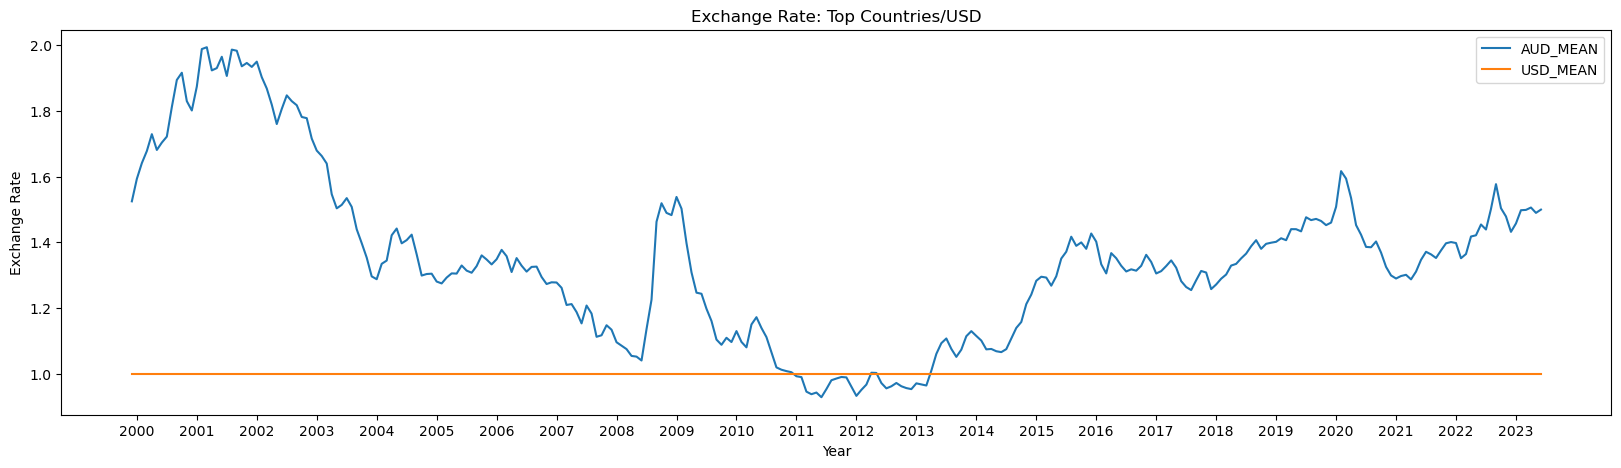

In [79]:
forex_all = df_2000_2023[["AUD_USD", "USD"]]
labels = ["AUD_MEAN", "USD_MEAN"]
x_ticks = list(range(1, 283, 12))
x_ticklabels = [x for x in range(2000, 2024)]
plt.figure(figsize=(20 ,5))
ax = plt.subplot()
plt.plot(x, forex_all)
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels)
plt.legend(labels)
plt.title("Exchange Rate: Top Countries/USD")
plt.xlabel("Year")
plt.ylabel("Exchange Rate")
plt.show()

In [82]:
df.head()

,DATE,OPEN,HIGH,LOW,CLOSE,MONTH,YEAR,MONTH_YEAR
0,2023-07-04,1.49997,1.50639,1.49419,1.49943,7,2023,2023-07
1,2023-06-30,1.49660,1.51591,1.48750,1.49990,6,2023,2023-06
2,2023-06-23,1.45256,1.50065,1.45250,1.49700,6,2023,2023-06
3,2023-06-16,1.48225,1.48529,1.44890,1.45400,6,2023,2023-06
4,2023-06-09,1.51348,1.51962,1.48100,1.48320,6,2023,2023-06


In [86]:
x = df[["OPEN", "HIGH", "LOW"]]

In [87]:
x = df[["OPEN", "HIGH", "LOW"]]
y = df["CLOSE"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [88]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [89]:
data = pd.DataFrame(data={"Predicted Rate": ypred.flatten()})
print(data.head())

   Predicted Rate
0          1.2598
1          1.5592
2          1.3187
3          1.3925
4          1.3976


In [91]:
#Summary
#In this we used the Decision Tree Regression algorithm to predict the currency exchange rates. Above data frame shows the prediction based for 5 upcoming days.

In [7]:
####################################Linear Regression ###########################################################
# Load the forex data into a Pandas DataFrame
data = pd.read_csv('forex_data_aud.csv', parse_dates=['DATE'])

# Convert dates to numerical representation
data['DATE'] = data['DATE'].astype('int64')

# Split the data into features (X) and target variable (y)
X = data.drop('CLOSE', axis=1)
y = data['CLOSE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Predict future values
future_data = pd.DataFrame({'DATE': [pd.to_datetime('2023-07-11').value], 'OPEN': [1.49000], 'HIGH': [1.51000], 'LOW': [1.48000]})
future_data['DATE'] = future_data['DATE'].astype('int64')
future_pred = model.predict(future_data)
print(f"Predicted future forex price: {future_pred}")

Mean Squared Error: 0.004315726549937958
Predicted future forex price: [1.45852866]


C:\Users\rosha\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [3]:
## NEURAL NETWORK

In [10]:
################################NEURAL NETWORK
# Load the CSV data into a Pandas DataFrame
df = pd.read_csv('forex_data_aud.csv')

# Prepare the features and target variable
X = df[['OPEN', 'HIGH', 'LOW']].values
y = df['CLOSE'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural network architecture
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(3,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=["accuracy"])
# model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


# Model training
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32)

# Model evaluation
# loss = model.evaluate(X_test_scaled, y_test)
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# Prepare feature values for future prediction
future_data = scaler.transform([[1.49000, 1.51000, 1.48000]])

# Make predictions for the future data
future_pred = model.predict(future_data)
print(f"Predicted future forex price: {future_pred}")

Epoch 1/100
12/12 [==============================] - 1s 2ms/step - loss: 1.3734 - accuracy: 0.0000e+00
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6458 - accuracy: 0.0000e+00
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4947 - accuracy: 0.0000e+00
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.0000e+00
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3275 - accuracy: 0.0000e+00
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 0.2461 - accuracy: 0.0000e+00
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1721 - accuracy: 0.0000e+00
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1036 - accuracy: 0.0000e+00
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 0.0547 - accuracy: 0.0000e+00
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: